In [31]:
import numpy as np
from matplotlib import pyplot as plt
import time

def distance(a,b):
    d = 0
    #Different dimensions
    if(len(a) != len(b)):
        return -99999
    
    for i in range(len(a)):
        d += (b[i] - a[i])**2
        
    return d

# Works with any dimension
def assignment(centroids, points):
    
    # assign_dict= ({centroid : assigned points}) 
    assign_dict = {}
    
    # I cant assign a list to be a key, so I turn the centroids into tuples
    # trick to initialize all the keys with a empty list, so that I can simply append
    for c in centroids:
         assign_dict.setdefault(tuple(c), [])
    
    distances_matrix = np.ones(shape = (points.shape[0], len(centroids)))
    
    # Fill the distances matrix
    for i in range(len(centroids)):
        distances = []
        centroid = centroids[i]
        
        for point in points:
            distances.append(distance(point, centroid))
        
        distances_matrix[:, i] = distances
    
    # Column is the centroid, row is the point
    for d in range(len(distances_matrix)):
        centroid_index = 0
        minimum_distance = 99999
        
        # Pick between the centroid distances, centroid ordering here causes first come first served
        for c in range(len(centroids)):
            if(distances_matrix[d][c] < minimum_distance):
                minimum_distance = distances_matrix[d][c]
                centroid_index = c
                
        cent = centroids[centroid_index]
        
        # Add to the dictionary, the index of the point
        assign_dict[tuple(cent)].append(d)    
    
    # assign_dict= ({centroid : assigned points}) 
    return assign_dict

def figure_visualize(assign_dict, points, fig, ax):
    
    # lets try moving this out of the function,
    # so we only generate one graph, then update it
    ax.clear()
    color_index = 0
    centroid_colors = ['tab:blue', 'tab:orange', 'tab:green',
                       'tab:red', 'tab:purple', 'tab:brown',
                       'tab:pink', 'tab:gray', 'tab:olive',
                       'tab:cyan']
    
    for key, value in assign_dict.items():
        cx = key[0]
        cy = key[1]
        x = points[value][:,0]
        y = points[value][:,1]
        color = centroid_colors[color_index % len(centroid_colors)]
        
        #ax.scatter(cx,cy, s = 100, color = 'k', edgecolors = 'k')
        ax.scatter(cx,cy, s = 100, color = color, edgecolors = 'k',zorder =2)
        for i in range(len(x)):
            ax.plot([cx,x[i]],[cy,y[i]], color = color, linestyle = '-', marker = 'o', zorder = 1)
        color_index += 1
    return

# Assignment visual, shows centroid and assignee linked together
# Only works in 2D
def canvas_visualize(assign_dict, points, canvas, ax):
    
    # lets try moving this out of the function,
    # so we only generate one graph, then update it
    ax.clear()
    color_index = 0
    centroid_colors = ['tab:blue', 'tab:orange', 'tab:green',
                       'tab:red', 'tab:purple', 'tab:brown',
                       'tab:pink', 'tab:gray', 'tab:olive',
                       'tab:cyan']
    
    for key, value in assign_dict.items():
        cx = key[0]
        cy = key[1]
        x = points[value][:,0]
        y = points[value][:,1]
        color = centroid_colors[color_index % len(centroid_colors)]
        
        #ax.scatter(cx,cy, s = 100, color = 'k', edgecolors = 'k')
        ax.scatter(cx,cy, s = 100, color = color, edgecolors = 'k',zorder =2)
        for i in range(len(x)):
            ax.plot([cx,x[i]],[cy,y[i]], color = color, linestyle = '-', marker = 'o', zorder = 1)
        color_index += 1
        
    canvas.draw()    
    return

# Works with any dimension
def update(assign_dict, centroids,points):
    for key, value in assign_dict.items():
        og_k = list(key)
        new_k = list(key)
        
        for i in range(len(og_k)):
            new_k[i] = points[value][:,i].sum()/len(points[value][:,i])
            
        centroids[centroids.index(og_k)] = new_k
    return

#Generate random points.
def generate_points(start,end,size):
    return np.random.randint(start,end, size = (size, 2))

def unique_generate_points(start,end,size):
    a = np.random.randint(start,end, size = (size, 2))
    while len(np.unique(a, axis = 0)) != size:
        a = np.random.randint(start,end, size = (size, 2))
    return a

def k_means_algorithm(k,centroids,points):
    
    #Assign

    fig, ax = plt.subplots(figsize = (5,5))
    
    assign_dict = assignment(centroids, points)

    #Visualize the assignment
    figure_visualize(assign_dict, points, fig, ax )

    #Update centroids
    update(assign_dict, centroids, points)
    #time.sleep(10)
    
    #generate_points(50)

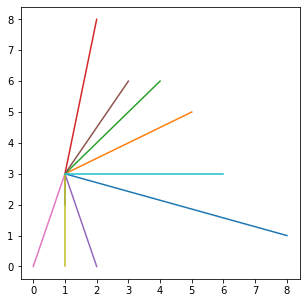

In [16]:
#x = np.array([8, 5, 4, 2, 2, 3, 0, 1, 1, 6])
#y = np.array([1, 5, 6, 8, 0, 6, 0, 2, 0, 3])
#points = np.zeros(shape=(2,len(x))).T
#points[:, 0] = x
#points[:, 1] = y
#
#centroids = [[1,3],[4,5], [8,5]]
#fig, ax = plt.subplots(figsize = (5,5))
#
#for i in range(len(x)):
#    ax.plot([1,x[i]], [3,y[i]])

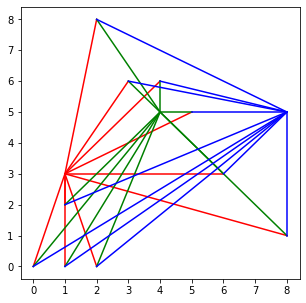

In [20]:
#x = np.array([8, 5, 4, 2, 2, 3, 0, 1, 1, 6])
#y = np.array([1, 5, 6, 8, 0, 6, 0, 2, 0, 3])
#points = np.zeros(shape=(2,len(x))).T
#points[:, 0] = x
#points[:, 1] = y
#
#centroids = [[1,3],[4,5], [8,5]]
#fig, ax = plt.subplots(figsize = (5,5))
#
#color = ['r', 'g', 'b']
#for c in range(len(centroids)):
#    for i in range(len(x)):
#        ax.plot([centroids[c][0],x[i]], [centroids[c][1],y[i]], color[c])

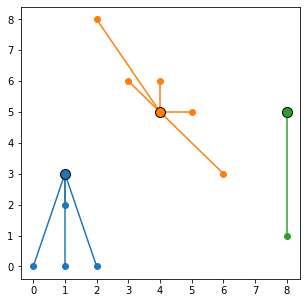

In [6]:
#x = np.array([8, 5, 4, 2, 2, 3, 0, 1, 1, 6])
#y = np.array([1, 5, 6, 8, 0, 6, 0, 2, 0, 3])
#points = np.zeros(shape=(2,len(x))).T
#points[:, 0] = x
#points[:, 1] = y
#
#centroids = [[1,3],[4,5], [8,5]]
#
#k_means_algorithm(0, centroids, points)